# Plot delta Mag vs G - I


- author : Sylvie Dagoret
- affiliation : LAL/IN2P3/CNRS
- creation date : October 15th 2018
- update : October 22th 2018

In [144]:
import pandas as pd
import numpy as np
import os,sys
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
from astropy.io import fits
%matplotlib inline
from scipy.interpolate import interp1d

In [145]:
import os
import re

In [146]:
from astropy.io import fits

In [147]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [148]:
import matplotlib.colors as colors
import matplotlib.cm as cmx

In [149]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (14, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [150]:
path='.'
txt_files = [f for f in os.listdir(path) if f.endswith('.txt')]  

In [151]:
txt_files

['dataout_DeltaYvsGmI_z21.txt',
 'dataout_DeltaYvsGmI_z25.txt',
 'dataout_DeltaRvsGmI_z14.txt',
 'dataout_DeltaYvsGmI_z12.txt',
 'dataout_DeltaYvsGmI_z23.txt',
 'dataout_DeltaYvsGmI_z20.txt',
 'dataout_DeltaRvsGmI_z23.txt',
 'dataout_DeltaYvsGmI_z11.txt',
 'dataout_DeltaYvsGmI_z13.txt',
 'dataout_DeltaYvsGmI_z10.txt',
 'dataout_DeltaYvsGmI_z16.txt',
 'dataout_DeltaRvsGmI_z20.txt',
 'dataout_DeltaRvsGmI_z22.txt',
 'dataout_DeltaRvsGmI_z13.txt',
 'dataout_DeltaYvsGmI_z22.txt',
 'dataout_DeltaYvsGmI_z17.txt',
 'dataout_DeltaYvsGmI_z19.txt',
 'dataout_DeltaRvsGmI_z10.txt',
 'dataout_DeltaRvsGmI_z17.txt',
 'dataout_DeltaRvsGmI_z11.txt',
 'dataout_DeltaYvsGmI_z14.txt',
 'dataout_DeltaRvsGmI_z25.txt',
 'dataout_DeltaYvsGmI_z18.txt',
 'dataout_DeltaRvsGmI_z18.txt',
 'dataout_DeltaRvsGmI_z16.txt',
 'dataout_DeltaRvsGmI_z21.txt',
 'dataout_DeltaRvsGmI_z12.txt',
 'dataout_DeltaRvsGmI_z19.txt']

# Definitions

In [152]:
keysel_filename='^dataout_DeltaYvsGmI_z*'
keysel2_filename='^dataout_DeltaYvsGmI_z([0-9]+)*'

In [153]:
title="$\Delta Y$ vs G-I (optimized for airmass=1.2)"
xlabel="color : G-I"
ylabel="$\Delta Y$"
YMIN,YMAX=-0.015,0.015
figfilename="FigDeltaYvsCol.png"

In [154]:
keysel_filename='^dataout_DeltaRvsGmI_z*'
keysel2_filename='^dataout_DeltaRvsGmI_z([0-9]+)*'

In [155]:
title="$\Delta R$ vs G-I (optimized for airmass=1.2)"
xlabel="color : G-I"
ylabel="$\Delta R$"
YMIN,YMAX=-0.015,0.015
figfilename="FigDeltaRvsCol.png"

In [156]:
sel_files = []
for file in txt_files:
    if re.findall(keysel_filename,file):
        sel_files.append(file)

sel_files=np.array(sel_files)

In [157]:
sel_files.sort()

In [158]:
sel_files

array(['dataout_DeltaRvsGmI_z10.txt', 'dataout_DeltaRvsGmI_z11.txt',
       'dataout_DeltaRvsGmI_z12.txt', 'dataout_DeltaRvsGmI_z13.txt',
       'dataout_DeltaRvsGmI_z14.txt', 'dataout_DeltaRvsGmI_z16.txt',
       'dataout_DeltaRvsGmI_z17.txt', 'dataout_DeltaRvsGmI_z18.txt',
       'dataout_DeltaRvsGmI_z19.txt', 'dataout_DeltaRvsGmI_z20.txt',
       'dataout_DeltaRvsGmI_z21.txt', 'dataout_DeltaRvsGmI_z22.txt',
       'dataout_DeltaRvsGmI_z23.txt', 'dataout_DeltaRvsGmI_z25.txt'],
      dtype='<U27')

In [159]:
NBFILES=len(sel_files)

In [160]:
all_am=[]
for file in sel_files:
    am_str=re.findall(keysel2_filename,file)[0]
    am=float(am_str)/10.
    all_am.append(am)

In [161]:
all_am=np.array(all_am)

In [162]:
all_am

array([ 1. ,  1.1,  1.2,  1.3,  1.4,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.5])

In [163]:
jet = cm = plt.get_cmap('jet')
cNorm  = colors.Normalize(vmin=0, vmax=NBFILES)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)

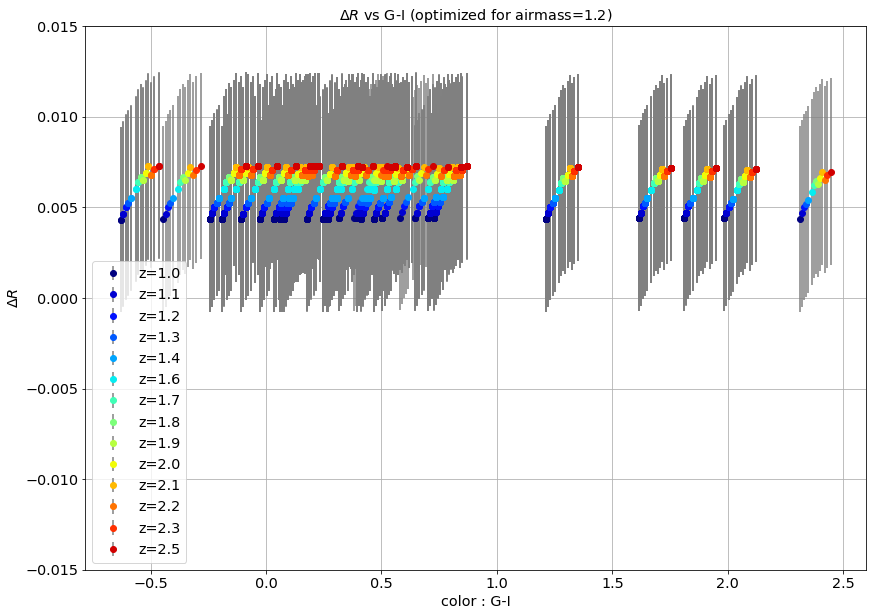

In [165]:
for idx in np.arange(NBFILES):    
    colorVal = scalarMap.to_rgba(idx)
    thelabel="z={:2.1f}".format(all_am[idx])
    data=np.loadtxt(os.path.join(path,sel_files[idx]))
    color=data[:,0]
    mag=data[:,1]
    err=data[:,2]
    #plt.plot(color,mag,'-',color=colorVal)
    plt.errorbar(color,mag, yerr=err, fmt='o',color=colorVal,ecolor='grey', label=thelabel) 
plt.grid(True)
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.legend(loc='best')
plt.ylim(YMIN,YMAX)
plt.savefig(figfilename)